<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.1 일반화: 머신 러닝의 목표

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.keras.backend.set_floatx('float16')

In [3]:
# MNIST에 백색 잡음 픽셀과 0픽셀 추가하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
# 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6138 - accuracy: 0.8188 - val_loss: 0.3347 - val_accuracy: 0.8994
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2563 - accuracy: 0.9375 - val_loss: 0.2289 - val_accuracy: 0.9341
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1670 - accuracy: 0.9673 - val_loss: 0.1771 - val_accuracy: 0.9482
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1204 - accuracy: 0.9834 - val_loss: 0.1580 - val_accuracy: 0.9521
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9907 - val_loss: 0.1532 - val_accuracy: 0.9585
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9946 - val_loss: 0.1610 - val_accuracy: 0.9521
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9961 - val_loss: 0.1238 - val_accuracy: 0.9692
Epoch 

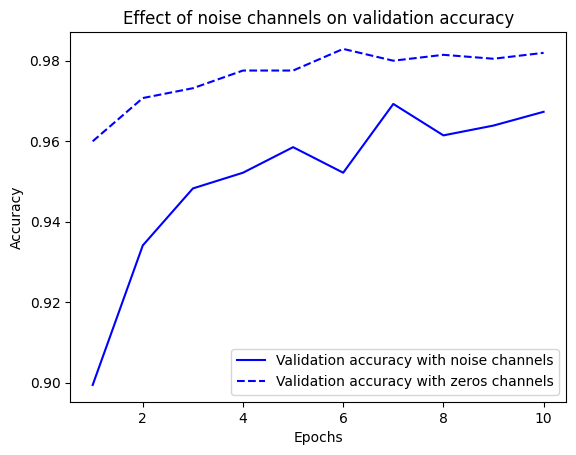

In [6]:
# 검증 정확도 비교 그래프 그리기

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
# 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: inf - accuracy: 0.1060 - val_loss: 2.2871 - val_accuracy: 0.1077
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1180 - val_loss: 2.2988 - val_accuracy: 0.1079
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: inf - accuracy: 0.1256 - val_loss: 2.3164 - val_accuracy: 0.1052
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1367 - val_loss: 2.3281 - val_accuracy: 0.1039
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1508 - val_loss: 2.3340 - val_accuracy: 0.1012
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1621 - val_loss: 2.3516 - val_accuracy: 0.0975
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1738 - val_loss: 2.3613 - val_accuracy: 0.0988
Epoch 8/100
375/375 